<a href="https://colab.research.google.com/github/sh1var3ddy/CNN/blob/main/TestingTBbacilli.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!which pip3
import os

/usr/local/bin/pip3


In [ ]:
!python -m pip install pyyaml==5.1
# Detectron2 has not released pre-built binaries for the latest pytorch (https://github.com/facebookresearch/detectron2/issues/4053)
# so we install from source instead. This takes a few minutes.
!python -m pip install 'git+https://github.com/facebookresearch/detectron2.git'

# Install pre-built detectron2 that matches pytorch version, if released:
# See https://detectron2.readthedocs.io/tutorials/install.html for instructions
#!pip install detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/{CUDA_VERSION}/{TORCH_VERSION}/index.html


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 274 kB 4.9 MB/s 
  Created wheel for pyyaml: filename=PyYAML-5.1-cp37-cp37m-linux_x86_64.whl size=44092 sha256=2c9c77f532150ef267427e59a874dee22305a0b25562f84ccf4c1a2ff418af94
  Stored in directory: /root/.cache/pip/wheels/77/f5/10/d00a2bd30928b972790053b5de0c703ca87324f3fead0f2fd9
Successfully built pyyaml
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/facebookresearch/detectron2.git to /tmp/pip-req-build-yy4qenrj
  Running command git clone -q https://github.com/facebookresearch/detectron2.git /tmp/pip-req-build-yy4qenrj
     |████████████████████████████████| 50 kB 3.2 MB/s 
     |████████████████████████████████| 79 kB 

In [ ]:
# -*- coding: utf-8 -*-
"""detectron2.ipynb

Automatically generated by Colaboratory.

Original file is located at
    https://colab.research.google.com/drive/192QVcROHVBDzmdULtF7vRMS_1onvrP1P
"""
# !pip install google.c
# from google.colab import drive

# drive.mount('/content/gdrive')
# install dependencies: 


# pyyaml is a data serialization language.YAML is used to create configuration files.
# Serialization is the process of converting a data object
# pycocotools is a Python API that assists in loading, parsing and visualizing the annotations in COCO.

#!pip3 install pyyaml==5.1 pycocotools>=2.0.1
import torch, torchvision

print(torch.__version__, torch.cuda.is_available())
!gcc --version
# opencv is pre-installed on colab

# install detectron2: (Colab has CUDA 10.1 + torch 1.7)
# See https://detectron2.readthedocs.io/tutorials/install.html for instructions
#assert torch.__version__.startswith("1.6")

#!pip3 install detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.7/index.html
#### Uploading data(Mitos-12,Mitos-14,Madhubushi) from drive ########

# !pip install gdown
# !gdown https://drive.google.com/uc?id=1t3rcqyI_tfSn_VsxhyfjsZYvnznADxCz #Data without normalization

# !unzip /content/frcnn.zip; rm /content/frcnn.zip

# HistomicsTK is a Python package for the analysis of digital pathology images.

#!pip3 install histomicstk --find-links https://girder.github.io/large_image_wheels
torch.cuda.empty_cache() 

1.12.0+cu113 True
gcc (Ubuntu 7.5.0-3ubuntu1~18.04) 7.5.0
Copyright (C) 2017 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.



In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# #normalization
import matplotlib.pyplot as plt
import cv2
import glob
from tqdm import tqdm
import numpy as np
import os, json,  random
# import histomicstk as htk
#Scikit-image, or skimage, is an open source Python package designed for image preprocessing.
# import skimage.io
# import skimage.measure
# import skimage.color
# ref_image_file = ('https://data.kitware.com/api/v1/file/57718cc28d777f1ecd8a883c/download')
# im_reference = skimage.io.imread(ref_image_file)[:, :, :3]
# # #fig,a=plt.subplots(1,2,figsize=(40,40))
# print(im_reference.shape)

# def normalize(im_input):
#     mean_ref, std_ref = htk.preprocessing.color_conversion.lab_mean_std(im_reference)
#     im_nmzd = htk.preprocessing.color_normalization.reinhard(im_input, mean_ref, std_ref)
#     return im_nmzd

#######    Normalising all the images according to histomicstk  ########
test=glob.glob("/content/gdrive/MyDrive/TB/test/images/*.jpg")
train=glob.glob("/content/gdrive/MyDrive/TB/train/images/*.jpg")
valid=glob.glob("/content/gdrive/MyDrive/TB/test/images/*.jpg")
# icpr14=glob.glob("./test/icpr14/*.png")
print(len(test),len(train),len(valid))

200 800 200


In [ ]:
# Some basic setup:
# Setup detectron2 logger
import matplotlib.pyplot as plt
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import os, json, cv2, random
#from google.colab.patches import cv2_imshow

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog

from detectron2.data.datasets import register_coco_instances
# print(os.listdir("Data_13"))

register_coco_instances("train", {}, "/content/gdrive/MyDrive/TB/train/annot1.json", "/content/gdrive/MyDrive/TB/train/images/")
register_coco_instances("test", {}, "/content/gdrive/MyDrive/TB/test/annot1.json", "/content/gdrive/MyDrive/TB/test/images/")
# register_coco_instances("test_12", {}, "/home/kmit/Mitosis_birac/karthik_manudeep/frcnn-with-normalization/test/icpr12/test_coco.json", "/home/kmit/Mitosis_birac/karthik_manudeep/frcnn-with-normalization/test/icpr12")
# register_coco_instances("test-14", {}, "/home/kmit/Mitosis_birac/karthik_manudeep/frcnn-with-normalization/test/icpr14/test_coco.json", "/home/kmit/Mitosis_birac/karthik_manudeep/frcnn-with-normalization/test/icpr14")

print(MetadataCatalog.get("train"))
print(MetadataCatalog.get("test"))

Metadata(evaluator_type='coco', image_root='/content/gdrive/MyDrive/TB/train/images/', json_file='/content/gdrive/MyDrive/TB/train/annot1.json', name='train')
Metadata(evaluator_type='coco', image_root='/content/gdrive/MyDrive/TB/test/images/', json_file='/content/gdrive/MyDrive/TB/test/annot1.json', name='test')


[07/21 10:20:02 d2.data.datasets.coco]: Loaded 100 images in COCO format from /content/gdrive/MyDrive/TB/test/annot1.json
/content/gdrive/MyDrive/TB/test/images/tuberculosis-phone-0900.jpg


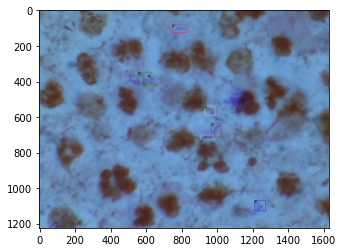

In [ ]:
#visualize training data
#print(DatasetCatalog.get('train'))
dataset_dicts = DatasetCatalog.get("test")
my_dataset_train_metadata = MetadataCatalog.get("test")
# for x in dataset_dicts:
#   print(x)
# print(my_dataset_train_metadata)
# print(dataset_dicts)
import random
from detectron2.utils.visualizer import Visualizer
for d in random.sample(dataset_dicts, 1):
    img = cv2.imread(d["file_name"])
    print(d["file_name"])
    visualizer = Visualizer(img[:, :, ::-1], metadata=my_dataset_train_metadata, scale=1)
    vis = visualizer.draw_dataset_dict(d)
    plt.imshow(vis.get_image()[:, :, ::-1])


In [ ]:

from detectron2.engine import DefaultTrainer
cfg1 = get_cfg()

cfg1.merge_from_file(model_zoo.get_config_file("COCO-Detection/faster_rcnn_X_101_32x8d_FPN_3x.yaml"))
cfg1.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Detection/faster_rcnn_X_101_32x8d_FPN_3x.yaml")  # Let training initialize from model zoo

cfg1.OUTPUT_DIR="/content/gdrive/MyDrive/DatasetTB/logs/19-07-2022"

# ---------------------------------------------------------------------------- #
# INPUT
# ---------------------------------------------------------------------------- #


#print(cfg1.INPUT)
# Size of the smallest side of the image during testing. Set to zero to disable resize in testing.
cfg1.INPUT.MIN_SIZE_TEST=0

# Maximum size of the side of the image during testing
cfg1.INPUT.MAX_SIZE_TEST=512

# Size of the smallest side of the image during training
cfg1.INPUT.MIN_SIZE_TRAIN=0

# Maximum size of the side of the image during training
cfg1.INPUT.MAX_SIZE_TRAIN=512

In [ ]:
# ---------------------------------------------------------------------------- #
# CROP
# ---------------------------------------------------------------------------- #
#cfg1.INPUT.CROP.ENABLED="TRUE"

# Cropping type:
# - "relative" crop (H * CROP.SIZE[0], W * CROP.SIZE[1]) part of an input of size (H, W)
# - "relative_range" uniformly sample relative crop size from between [CROP.SIZE[0], [CROP.SIZE[1]].
#   and  [1, 1] and use it as in "relative" scenario.
# - "absolute" crop part of an input with absolute size: (CROP.SIZE[0], CROP.SIZE[1]).
# - "absolute_range", for an input of size (H, W), uniformly sample H_crop in
#   [CROP.SIZE[0], min(H, CROP.SIZE[1])] and W_crop in [CROP.SIZE[0], min(W, CROP.SIZE[1])]
#cfg1.INPUT.CROP.TYPE = "relative_range"

# Mode for flipping images used in data augmentation during training
# choose one of ["horizontal, "vertical", "none"]
#_C.INPUT.RANDOM_FLIP =#We are importing our own Trainer Module here to use the COCO validation evaluation during training. Otherwise no validation eval occurs.

from detectron2.engine import DefaultTrainer
from detectron2.evaluation import COCOEvaluator



#print("\n",cfg1.INPUT)

# ---------------------------------------------------------------------------- #
# DATASET
# ---------------------------------------------------------------------------- #

cfg1.DATASETS.TRAIN = ("train",)
cfg1.DATASETS.TEST = ("test",)

# ---------------------------------------------------------------------------- #
# DATALOADER 
# ---------------------------------------------------------------------------- #

#print(cfg1.DATALOADER)
# Number of data loading threads
#cfg1.DATALOADER.NUM_WORKERS = 4


# If True, each batch should contain only images for which the aspect ratio
# is compatible. This groups portrait images together, and landscape images
# are not batched with portrait images.
cfg1.DATALOADER.ASPECT_RATIO_GROUPING = True

In [ ]:
# ---------------------------------------------------------------------------- #
# FPN 
# ---------------------------------------------------------------------------- #

print("FPN\n")
print(cfg1.MODEL.FPN,"\n")


# ---------------------------------------------------------------------------- #
# ANCHOR GENERATOR
# ---------------------------------------------------------------------------- #

# Anchor sizes (i.e. sqrt of area) in absolute pixels w.r.t. the network input.
cfg1.MODEL.ANCHOR_GENERATOR.SIZES = [[8,16,32]]

# Anchor angles.
# list[list[float]], the angle in degrees, for each input feature map.
# ANGLES[i] specifies the list of angles for IN_FEATURES[i].
cfg1.MODEL.ANCHOR_GENERATOR.ANGLES = [[-90, 0, 90]]
print("ANCHOR GENERATOR\n")
print(cfg1.MODEL.ANCHOR_GENERATOR,"\n")


# ---------------------------------------------------------------------------- #
# RPN
# ---------------------------------------------------------------------------- #

# IOU overlap ratios [BG_IOU_THRESHOLD, FG_IOU_THRESHOLD]
# Minimum overlap required between an anchor and ground-truth box for the
# (anchor, gt box) pair to be a positive example (IoU >= FG_IOU_THRESHOLD
# ==> positive RPN example: 1)
# Maximum overlap allowed between an anchor and ground-truth box for the
# (anchor, gt box) pair to be a negative examples (IoU < BG_IOU_THRESHOLD
# ==> negative RPN example: 0)
# Anchors with overlap in between (BG_IOU_THRESHOLD <= IoU < FG_IOU_THRESHOLD)
# are ignored (-1)
cfg1.MODEL.RPN.IOU_THRESHOLDS = [0.1, 0.7]

# NMS threshold used on RPN proposals
cfg1.MODEL.RPN.NMS_THRESH = 0.7

print("RPN\n")
print(cfg1.MODEL.RPN,"\n")


FPN

FUSE_TYPE: sum
IN_FEATURES: ['res2', 'res3', 'res4', 'res5']
NORM: 
OUT_CHANNELS: 256 

ANCHOR GENERATOR

ANGLES: [[-90, 0, 90]]
ASPECT_RATIOS: [[0.5, 1.0, 2.0]]
NAME: DefaultAnchorGenerator
OFFSET: 0.0
SIZES: [[8, 16, 32]] 

RPN

BATCH_SIZE_PER_IMAGE: 256
BBOX_REG_LOSS_TYPE: smooth_l1
BBOX_REG_LOSS_WEIGHT: 1.0
BBOX_REG_WEIGHTS: (1.0, 1.0, 1.0, 1.0)
BOUNDARY_THRESH: -1
CONV_DIMS: [-1]
HEAD_NAME: StandardRPNHead
IN_FEATURES: ['p2', 'p3', 'p4', 'p5', 'p6']
IOU_LABELS: [0, -1, 1]
IOU_THRESHOLDS: [0.1, 0.7]
LOSS_WEIGHT: 1.0
NMS_THRESH: 0.7
POSITIVE_FRACTION: 0.5
POST_NMS_TOPK_TEST: 1000
POST_NMS_TOPK_TRAIN: 1000
PRE_NMS_TOPK_TEST: 1000
PRE_NMS_TOPK_TRAIN: 2000
SMOOTH_L1_BETA: 0.0 



In [ ]:
# ---------------------------------------------------------------------------- #
# ROI HEADs
# ---------------------------------------------------------------------------- #

# IOU overlap ratios [IOU_THRESHOLD]
# Overlap threshold for an RoI to be considered background (if < IOU_THRESHOLD)
# Overlap threshold for an RoI to be considered foreground (if >= IOU_THRESHOLD)
cfg1.MODEL.ROI_HEADS.IOU_THRESHOLDS = [0.5]

# Target fraction of RoI minibatch that is labeled foreground (i.e. class > 0)
cfg1.MODEL.ROI_HEADS.POSITIVE_FRACTION = 0.25

# Number of foreground classes
cfg1.MODEL.ROI_HEADS.NUM_CLASSES = 1

# Overlap threshold used for non-maximum suppression (suppress boxes with
# IoU >= this threshold)
cfg1.MODEL.ROI_HEADS.NMS_THRESH_TEST = 0.7




# RoI minibatch size *per image* (number of regions of interest [ROIs])
# Total number of RoIs per training minibatch =
#   ROI_HEADS.BATCH_SIZE_PER_IMAGE * SOLVER.IMS_PER_BATCH
# E.g., a common configuration is: 512 * 16 = 8192
cfg1.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 512


print("ROI HEADS\n")
print(cfg1.MODEL.ROI_HEADS,"\n")

# ---------------------------------------------------------------------------- #
# BOX HEAD
# ---------------------------------------------------------------------------- #

print("ROI BOX HEADS\n")
print(cfg1.MODEL.ROI_BOX_HEAD,"\n")

ROI HEADS

BATCH_SIZE_PER_IMAGE: 512
IN_FEATURES: ['p2', 'p3', 'p4', 'p5']
IOU_LABELS: [0, 1]
IOU_THRESHOLDS: [0.5]
NAME: StandardROIHeads
NMS_THRESH_TEST: 0.7
NUM_CLASSES: 1
POSITIVE_FRACTION: 0.25
PROPOSAL_APPEND_GT: True
SCORE_THRESH_TEST: 0.05 

ROI BOX HEADS

BBOX_REG_LOSS_TYPE: smooth_l1
BBOX_REG_LOSS_WEIGHT: 1.0
BBOX_REG_WEIGHTS: (10.0, 10.0, 5.0, 5.0)
CLS_AGNOSTIC_BBOX_REG: False
CONV_DIM: 256
FC_DIM: 1024
FED_LOSS_FREQ_WEIGHT_POWER: 0.5
FED_LOSS_NUM_CLASSES: 50
NAME: FastRCNNConvFCHead
NORM: 
NUM_CONV: 0
NUM_FC: 2
POOLER_RESOLUTION: 7
POOLER_SAMPLING_RATIO: 0
POOLER_TYPE: ROIAlignV2
SMOOTH_L1_BETA: 0.0
TRAIN_ON_PRED_BOXES: False
USE_FED_LOSS: False
USE_SIGMOID_CE: False 



In [ ]:
# ---------------------------------------------------------------------------- #
# SOLVER
# ---------------------------------------------------------------------------- #


# See detectron2/solver/build.py for LR scheduler options
cfg1.SOLVER.LR_SCHEDULER_NAME = "WarmupMultiStepLR"

cfg1.SOLVER.WARMUP_ITERS = 500

# cfg1.SOLVER.MAX_ITER = 20000
cfg1.SOLVER.MAX_ITER = 2000

cfg1.SOLVER.BASE_LR = 0.001

cfg1.SOLVER.MOMENTUM = 0.9

cfg1.SOLVER.NESTEROV = False

cfg1.SOLVER.WEIGHT_DECAY = 0.0001
#In detectron2, epoch is MAX_ITER * BATCH_SIZE / TOTAL_NUM_IMAGES
# The weight decay that's applied to parameters of normalization layers
# (typically the affine transformation)
cfg1.SOLVER.WEIGHT_DECAY_NORM = 0.0

cfg1.SOLVER.GAMMA = 0.1


cfg1.SOLVER.STEPS = (1000,)

cfg1.TEST.EVAL_PERIOD = 250
# Save a checkpoint after every this number of iterations
cfg1.SOLVER.CHECKPOINT_PERIOD = 250

# Number of images per batch across all machines.
# If we have 16 GPUs and IMS_PER_BATCH = 32,
# each GPU will see 2 images per batch.
# May be adjusted automatically if REFERENCE_WORLD_SIZE is set.
cfg1.SOLVER.IMS_PER_BATCH = 2
#cfg1.SOLVER.IMS_PER_BATCH = 2

print("SOLVER\n")
print(cfg1.SOLVER,"\n")

SOLVER

AMP:
  ENABLED: False
BASE_LR: 0.001
BASE_LR_END: 0.0
BIAS_LR_FACTOR: 1.0
CHECKPOINT_PERIOD: 250
CLIP_GRADIENTS:
  CLIP_TYPE: value
  CLIP_VALUE: 1.0
  ENABLED: False
  NORM_TYPE: 2.0
GAMMA: 0.1
IMS_PER_BATCH: 2
LR_SCHEDULER_NAME: WarmupMultiStepLR
MAX_ITER: 2000
MOMENTUM: 0.9
NESTEROV: False
REFERENCE_WORLD_SIZE: 0
STEPS: (1000,)
WARMUP_FACTOR: 0.001
WARMUP_ITERS: 500
WARMUP_METHOD: linear
WEIGHT_DECAY: 0.0001
WEIGHT_DECAY_BIAS: None
WEIGHT_DECAY_NORM: 0.0 



In [ ]:
#We are importing our own Trainer Module here to use the COCO validation evaluation during training. Otherwise no validation eval occurs.

from detectron2.engine import DefaultTrainer
from detectron2.evaluation import COCOEvaluator

class CocoTrainer(DefaultTrainer):

  @classmethod
  def build_evaluator(cls, cfg, dataset_name, output_folder=None):

    if output_folder is None:
        os.makedirs("coco_eval", exist_ok=True)
        output_folder = "coco_eval"

    return COCOEvaluator(dataset_name, cfg, False, output_folder)

In [ ]:
from detectron2.engine import DefaultTrainer
from detectron2.evaluation import COCOEvaluator
os.makedirs(cfg1.OUTPUT_DIR, exist_ok=True)
trainer = CocoTrainer(cfg1)
trainer.resume_or_load(resume=True)

[07/21 10:21:58 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


[07/21 10:22:10 d2.checkpoint.c2_model_loading]: Following weights matched with model:
| Names in Model                                  | Names in Checkpoint                                                                                  | Shapes                                          |
|:------------------------------------------------|:-----------------------------------------------------------------------------------------------------|:------------------------------------------------|
| backbone.bottom_up.res2.0.conv1.*               | backbone.bottom_up.res2.0.conv1.{norm.bias,norm.running_mean,norm.running_var,norm.weight,weight}    | (256,) (256,) (256,) (256,) (256,64,1,1)        |
| backbone.bottom_up.res2.0.conv2.*               | backbone.bottom_up.res2.0.conv2.{norm.bias,norm.running_mean,norm.running_var,norm.weight,weight}    | (256,) (256,) (256,) (256,) (256,8,3,3)         |
| backbone.bottom_up.res2.0.conv3.*               | backbone.bottom_up.res2.0.conv3.{norm.bia

In [ ]:
### Evaluating the performance of Mitos-12 dataset #####
from detectron2.data import DatasetCatalog, MetadataCatalog, build_detection_test_loader
from detectron2.evaluation import COCOEvaluator, inference_on_dataset

cfg1.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5
evaluator = COCOEvaluator("test", cfg1, False, output_dir="/content/gdrive/MyDrive/TB/logs/21-07-2022")
val_loader = build_detection_test_loader(cfg1, "test")
inference_on_dataset(trainer.model, val_loader, evaluator)

WARNING [07/21 10:22:25 d2.evaluation.coco_evaluation]: COCO Evaluator instantiated using config, this is deprecated behavior. Please pass in explicit arguments instead.
[07/21 10:22:25 d2.data.datasets.coco]: Loaded 100 images in COCO format from /content/gdrive/MyDrive/TB/test/annot1.json
[07/21 10:22:25 d2.data.build]: Distribution of instances among all 1 categories:
|  category  | #instances   |
|:----------:|:-------------|
|     tb     | 762          |
|            |              |
[07/21 10:22:25 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(0, 0), max_size=512, sample_style='choice')]
[07/21 10:22:26 d2.data.common]: Serializing 100 elements to byte tensors and concatenating them all ...
[07/21 10:22:26 d2.data.common]: Serialized dataset takes 0.04 MiB
[07/21 10:22:26 d2.evaluation.evaluator]: Start inference on 100 batches


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


[07/21 10:22:35 d2.evaluation.evaluator]: Inference done 1/100. Dataloading: 0.6457 s/iter. Inference: 8.5785 s/iter. Eval: 0.0004 s/iter. Total: 9.2257 s/iter. ETA=0:15:13


/usr/local/lib/python3.7/dist-packages/torch/functional.py:478: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2894.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


[07/21 10:22:41 d2.evaluation.evaluator]: Inference done 11/100. Dataloading: 0.0016 s/iter. Inference: 0.5829 s/iter. Eval: 0.0004 s/iter. Total: 0.5849 s/iter. ETA=0:00:52
[07/21 10:22:46 d2.evaluation.evaluator]: Inference done 20/100. Dataloading: 0.0022 s/iter. Inference: 0.5852 s/iter. Eval: 0.0003 s/iter. Total: 0.5881 s/iter. ETA=0:00:47
[07/21 10:22:51 d2.evaluation.evaluator]: Inference done 29/100. Dataloading: 0.0025 s/iter. Inference: 0.5856 s/iter. Eval: 0.0002 s/iter. Total: 0.5887 s/iter. ETA=0:00:41
[07/21 10:22:57 d2.evaluation.evaluator]: Inference done 38/100. Dataloading: 0.0026 s/iter. Inference: 0.5868 s/iter. Eval: 0.0002 s/iter. Total: 0.5900 s/iter. ETA=0:00:36
[07/21 10:23:02 d2.evaluation.evaluator]: Inference done 47/100. Dataloading: 0.0027 s/iter. Inference: 0.5891 s/iter. Eval: 0.0002 s/iter. Total: 0.5924 s/iter. ETA=0:00:31
[07/21 10:23:07 d2.evaluation.evaluator]: Inference done 56/100. Dataloading: 0.0027 s/iter. Inference: 0.5918 s/iter. Eval: 0.000

OrderedDict([('bbox',
              {'AP': 4.963666855886134,
               'AP50': 17.82420917558138,
               'AP75': 1.7100554188080381,
               'APl': 13.219135649828717,
               'APm': 4.947110158583571,
               'APs': 0.0})])

[07/21 10:38:47 d2.checkpoint.c2_model_loading]: Following weights matched with model:
| Names in Model                                  | Names in Checkpoint                                                                                  | Shapes                                          |
|:------------------------------------------------|:-----------------------------------------------------------------------------------------------------|:------------------------------------------------|
| backbone.bottom_up.res2.0.conv1.*               | backbone.bottom_up.res2.0.conv1.{norm.bias,norm.running_mean,norm.running_var,norm.weight,weight}    | (256,) (256,) (256,) (256,) (256,64,1,1)        |
| backbone.bottom_up.res2.0.conv2.*               | backbone.bottom_up.res2.0.conv2.{norm.bias,norm.running_mean,norm.running_var,norm.weight,weight}    | (256,) (256,) (256,) (256,) (256,8,3,3)         |
| backbone.bottom_up.res2.0.conv3.*               | backbone.bottom_up.res2.0.conv3.{norm.bia

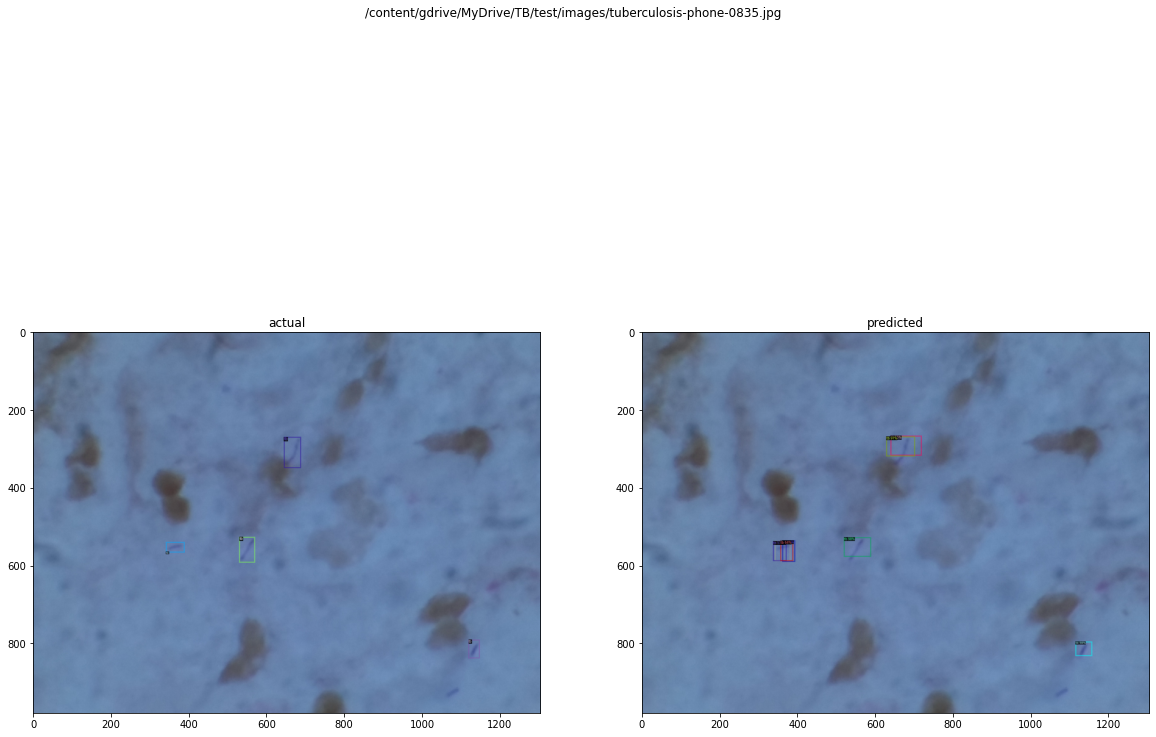

In [ ]:
### Viewing Mitos-14 test dataset #####
cfg1.MODEL.WEIGHTS = os.path.join(cfg1.OUTPUT_DIR, "model_0001999.pth")
cfg1.DATASETS.TEST = ("test", )
cfg1.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.3   # set the testing threshold for this model
predictor = DefaultPredictor(cfg1)
dataset_dicts = DatasetCatalog.get("test")
test_metadata = MetadataCatalog.get("test")
print(test_metadata)


from detectron2.utils.visualizer import ColorMode
import glob
import matplotlib.pyplot as plt


for d in random.sample(dataset_dicts, 1):
    img = cv2.imread(d["file_name"])
    img1 = cv2.imread(d["file_name"])
    outputs=predictor(img1)
    print(outputs)
    visualizer = Visualizer(img[:, :, ::-1], metadata=test_metadata, scale=0.8)
    vis = visualizer.draw_dataset_dict(d)
    v = Visualizer(img1[:, :, ::-1],metadata=test_metadata, scale=0.8)
    out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
    fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(20,15))
    fig.suptitle(d['file_name'])
    ax1.set_title("actual")
    ax1.imshow(vis.get_image()[:, :, ::-1],cmap="gray")
    ax2.set_title("predicted")
    ax2.imshow(out.get_image()[:, :, ::-1],cmap="gray")


[07/20 05:30:01 d2.checkpoint.c2_model_loading]: Following weights matched with model:
| Names in Model                                  | Names in Checkpoint                                                                                  | Shapes                                          |
|:------------------------------------------------|:-----------------------------------------------------------------------------------------------------|:------------------------------------------------|
| backbone.bottom_up.res2.0.conv1.*               | backbone.bottom_up.res2.0.conv1.{norm.bias,norm.running_mean,norm.running_var,norm.weight,weight}    | (256,) (256,) (256,) (256,) (256,64,1,1)        |
| backbone.bottom_up.res2.0.conv2.*               | backbone.bottom_up.res2.0.conv2.{norm.bias,norm.running_mean,norm.running_var,norm.weight,weight}    | (256,) (256,) (256,) (256,) (256,8,3,3)         |
| backbone.bottom_up.res2.0.conv3.*               | backbone.bottom_up.res2.0.conv3.{norm.bia

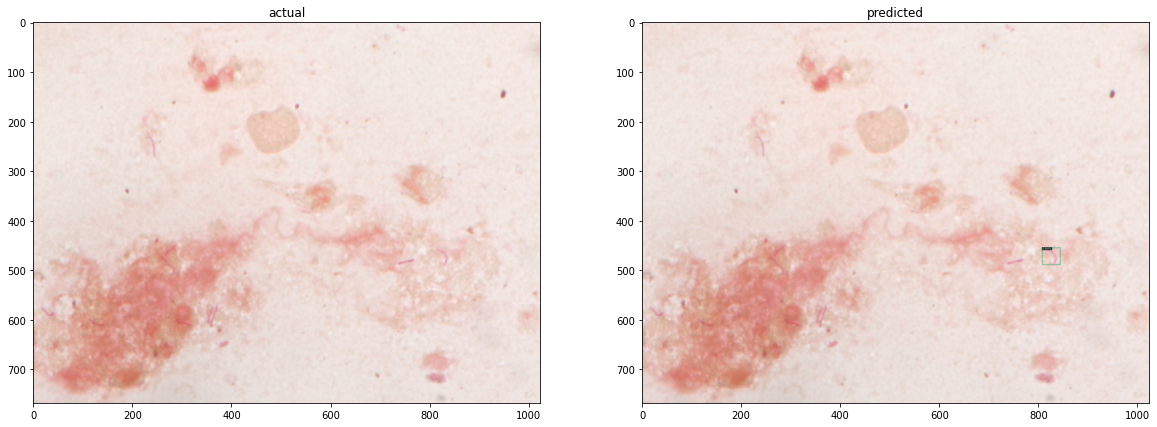

In [ ]:
### Viewing Mitos-14 test dataset #####
cfg1.MODEL.WEIGHTS = os.path.join(cfg1.OUTPUT_DIR, "model_final.pth")
cfg1.DATASETS.TEST = ("test", )
cfg1.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.3   # set the testing threshold for this model
predictor = DefaultPredictor(cfg1)
dataset_dicts = DatasetCatalog.get("test")
test_metadata = MetadataCatalog.get("test")
print(test_metadata)

path="/content/test3.jpeg"

from detectron2.utils.visualizer import ColorMode
import glob
import matplotlib.pyplot as plt


img = cv2.imread(path)
img1 = cv2.imread(path)
outputs=predictor(img1)
print(outputs)
visualizer = Visualizer(img[:, :, ::-1], scale=0.8)
vis = visualizer.draw_dataset_dict(d)
v = Visualizer(img1[:, :, ::-1], scale=0.8)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(20,15))
# fig.suptitle(d['file_name'])
ax1.set_title("actual")
ax1.imshow(vis.get_image()[:, :, ::-1],cmap="gray")
ax2.set_title("predicted")
ax2.imshow(out.get_image()[:, :, ::-1],cmap="gray")
